In [3]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from RLC.real_chess import tree, agent
# import endgame_agent as agent
import endgame_learn as learn
from randnoise_environment import Board
from chess.pgn import Game

# these are FENS, which are a concise way of representing the board states
# 10 common end games were selected for training purposes
endgame_fens = [
    # King, queen, and three pawns vs king, queen, and three pawns
    "4k3/1p2pp2/8/8/8/8/1P2PP2/4K3 w - - 0 1",
    # King, rook, knight, bishop, and pawn vs king, rook, knight, bishop, and pawn
    "4k3/1prnbp2/8/8/8/8/1PRNBP2/4K3 w - - 0 1",
    # King, two bishops and three pawns vs king, two knights and three pawns
    "4k3/1p1bpp2/8/8/8/8/1P1NNP2/4K3 w - - 0 1",
    # King, two rooks and three pawns vs king, two rooks and three pawns
    "4k3/1p1rrp2/8/8/8/8/1P1RRP2/4K3 w - - 0 1",
    # King, queen, knight, bishop and pawn vs king, queen, knight, bishop and pawn
    "4k3/1pqnbP2/8/8/8/8/1PQNBp2/4K3 w - - 0 1",
    # King, queen, two bishops and pawn vs king, queen, two bishops and pawn
    "4k3/1pqbbP2/8/8/8/8/1PQBBp2/4K3 w - - 0 1",
    # King, queen, two knights and pawn vs king, queen, two knights and pawn
    "4k3/1pqnNP2/8/8/8/8/1PQnnp2/4K3 w - - 0 1",
    # King, queen, rook, bishop, and pawn vs king, queen, rook, bishop, and pawn
    "4k3/1pqrBP2/8/8/8/8/1PQRbp2/4K3 w - - 0 1",
    # King, queen, rook, knight, and pawn vs king, queen, rook, knight, and pawn
    "4k3/1pqrNP2/8/8/8/8/1PQRnp2/4K3 w - - 0 1",
    # King, rook, two knights and pawn vs king, rook, two knights and pawn
    "4k3/1prnNP2/8/8/8/8/1PRNnp2/4K3 w - - 0 1"
]

opponent = agent.GreedyAgent()
env = Board(opponent, FEN=None, endgame_fens=endgame_fens)
player = agent.Agent(lr=0.0005,network='big')
learner = learn.TD_search(env, player,gamma=0.8,search_time=2)
node = tree.Node(learner.env.board, gamma=learner.gamma)
player.model.summary()

Using TensorFlow backend.



__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
state (InputLayer)              (None, 8, 8, 8)      0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 8, 8, 4)      36          state[0][0]                      
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 7, 7, 8)      264         state[0][0]                      
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 3, 3, 12)     876         state[0][0]                      
__________________________________________________________________________________________________
conv2d_4 

Skip below if you have a model already in mind

In [7]:
learner.learn(iters=1000000, timelimit_seconds=3600)

iter 0


In [6]:
learner.agent.model.save('RLC_model_test.h5')

Start here if you have a model in mind

In [13]:
from tensorflow.keras.models import load_model

learner.agent.model = load_model('RLC_model_test.h5')
learner.agent.fixed_model = load_model('RLC_model_test.h5')

In [14]:
learner.env.reset()
learner.search_time = 100
learner.temperature = 1/3

In [15]:
from randnoise_environment import Board

learner.play_game(1000, maxiter=30)

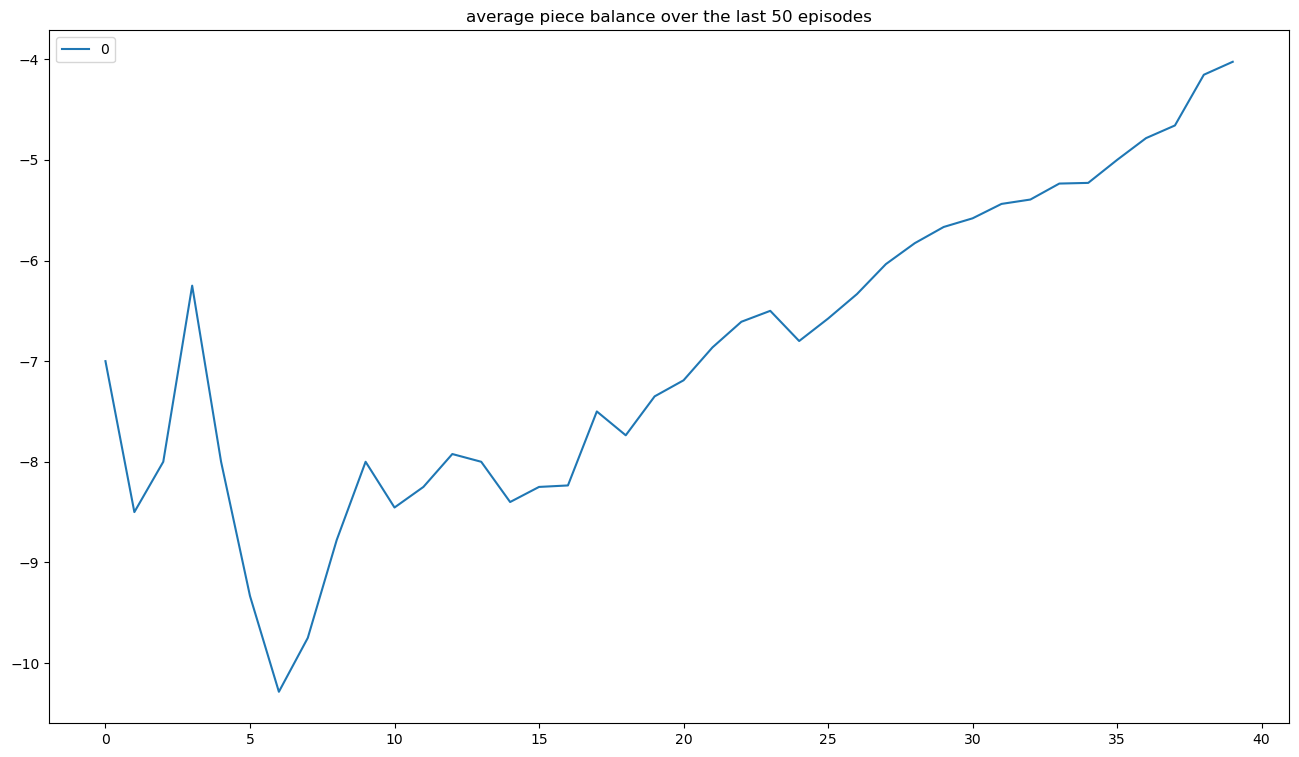

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

reward_smooth = pd.DataFrame(learner.piece_balance_trace)
reward_smooth.rolling(window=100,min_periods=0).mean().plot(figsize=(16,9),title='average piece balance over the last 50 episodes')
plt.show()

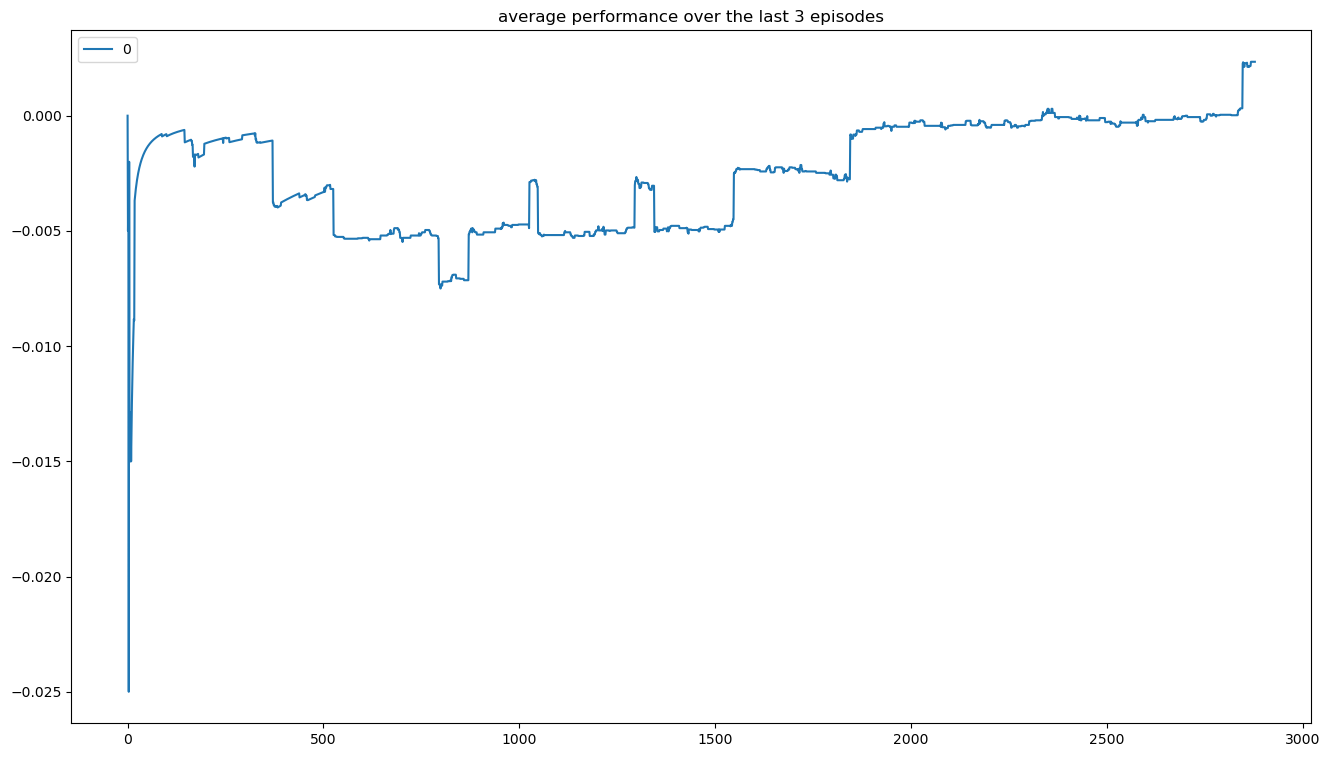

In [15]:
reward_smooth = pd.DataFrame(learner.reward_trace)
reward_smooth.rolling(window=500,min_periods=0).mean().plot(figsize=(16,9),title='average performance over the last 3 episodes')
plt.show()

In [16]:
pgn = Game.from_board(learner.env.board)
with open("rlc_pgn_randnoise2", "w") as log:
    log.write(str(pgn))